# TF-IDF de Substantivos em PDFs do Google Drive
Este notebook extrai texto de arquivos PDF armazenados em uma pasta do Google Drive, aplica lematização e filtra apenas os substantivos para análise com TF-IDF.

## Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Instalar bibliotecas necessárias

In [ ]:
!pip install -q unidecode spacy PyMuPDF
import nltk
nltk.download('stopwords')
import spacy
try:
    nlp = spacy.load("pt_core_news_sm")
except:
    from spacy.cli import download
    download("pt_core_news_sm")
    nlp = spacy.load("pt_core_news_sm")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 68.6 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importações

In [ ]:
import os
import fitz  # PyMuPDF
import pandas as pd
from unidecode import unidecode
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


## Leitura dos PDFs de um diretório

In [ ]:
# Substitua pelo caminho da sua pasta de PDFs no Drive
pdf_dir = '/content/drive/MyDrive/database/PDF'

documents = []
pdf_names = []

for filename in os.listdir(pdf_dir):
    if filename.endswith('.pdf'):
        path = os.path.join(pdf_dir, filename)
        with fitz.open(path) as doc:
            text = ''
            for page in doc:
                text += page.get_text()
        documents.append(text)
        pdf_names.append(filename)


In [ ]:
print(documents);
print(pdf_names)

['Brazilian Journal of Development \n \n     Braz. J. of  Develop., Curitiba, v. 6, n. 11, p. 84502-84515, nov. 2020.               ISSN 2525-8761 \n \n \n84502 \n \nManufatura aditiva: Revisão sistemática da literatura \n \nAdditive manufacturing: A systematic review \n \nDOI:10.34117/bjdv6n11-023 \n \nRecebimento dos originais: 19/10/2020  \nAceitação para publicação: 03/11/2020 \n \nPedro Coelho Silva \nGraduando de Engenharia Mecânica \nUniversidade Federal de São João del-Rei (UFSJ) \nUniversidade Federal de São João Del-Rei, Departamento de Mecânica, Praça Frei Orlando, n° 170 - \nCentro - São João del-Rei-MG \nE-mail: ocoelhopedro@gmail.com \n \nRafael Souza Santandrea \nUniversidade Federal de São João del-Rei (UFSJ) \nUniversidade Federal de São João Del-Rei, Departamento de Mecânica, Praça Frei Orlando, n° 170 - \nCentro - São João del-Rei-MG \nGraduando de Engenharia Mecânica \nE-mail: r.santandrea97@gmail.com \n \nLincoln Cardoso Brandão \nDoutor em Engenharia Mecânica \nUn

## Lematização e Extração de Substantivos

In [ ]:
stopwords_pt = set(stopwords.words('portuguese'))

def extract_nouns(text):
    doc = nlp(unidecode(text.lower()))
    return ' '.join([
        token.lemma_ for token in doc
        if token.pos_ == "NOUN" and token.lemma_ not in stopwords_pt and token.is_alpha
    ])

documents_nouns = [extract_nouns(doc) for doc in documents]


In [ ]:
print(documents_nouns)

['Brazilian braz nov manufatura revisao literatura manufacturing systematic recebimento original aceitacao publicacao engenharia universidade joao universidade departamento mecanica praca Centro joao santandreo universidade joao universidade departamento mecanica praca Centro joao engenharia doutor engenharia universidade joao universidade departamento mecanica praca Centro joao marco antonio engenharia universidade joao universidade departamento mecanica praca Centro joao Victor engenharia universidade joao universidade departamento mecanica praca Centro joao resumo manufatura tipo tecnologia tendencia metodologia fabricacao futuro crescimento ha ano mecanismo fabricacao sobreposicao camada atrave mecanismo uniao manufatura geometria brazilian braz nov impossivel forma fabricacao ultima aumento precisao equipamento reducao custo variedade material atrave revisao literatura artigo tipo analise investigacao fator popularizacao implementacao extincao patente inicio pesquisa necessidade l

## Aplicar TF-IDF nos Substantivos Lematizados

In [ ]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents_nouns)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=pdf_names)
tfidf_df


,aanufacturing,aberto,abimaq,abordagem,abr,abrangencia,abril,abs,absorcao,acabamento,...,workshop,worldpac,xeque,xu,yadroitsev,yan,zacao,zado,zhang,zhuo
artigoManufaturaAditiva.pdf,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015816
artigoManufaturaAditiva2.pdf,0.012813,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.010102,0.008179,...,0.025627,0.012813,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
artigoManufaturaAditiva3.pdf,0.000000,0.000000,0.000000,0.074193,0.11129,0.012366,0.000000,0.000000,0.009749,0.023678,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
artigoManufaturaAditiva4.pdf,0.000000,0.005829,0.005829,0.000000,0.00000,0.000000,0.005829,0.005829,0.000000,0.011162,...,0.000000,0.000000,0.005829,0.005829,0.005829,0.005829,0.017487,0.011658,0.005829,0.000000


## Similaridade entre Documentos (PDFs)

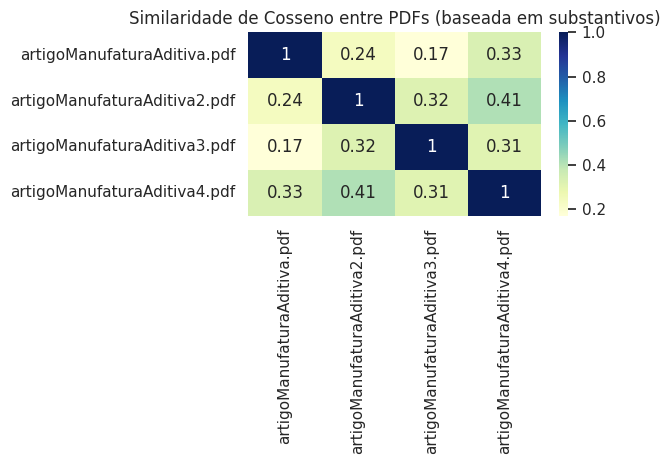

In [ ]:
cos_sim_matrix = cosine_similarity(tfidf_matrix)
cos_sim_df = pd.DataFrame(cos_sim_matrix, index=pdf_names, columns=pdf_names)

sns.heatmap(cos_sim_df, annot=True, cmap='YlGnBu')
plt.title("Similaridade de Cosseno entre PDFs (baseada em substantivos)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: ordene os substantivos de tfidf_df pela maior pontuação total

import pandas as pd
# Calcula a soma das pontuações TF-IDF para cada substantivo em todos os documentos
noun_total_scores = tfidf_df.sum(axis=0)

# Cria um DataFrame a partir das pontuações totais
noun_scores_df = pd.DataFrame(noun_total_scores, columns=['Pontuação Total'])

# Ordena o DataFrame pela pontuação total em ordem decrescente
sorted_nouns_df = noun_scores_df.sort_values(by='Pontuação Total', ascending=False)

# Exibe os substantivos ordenados
sorted_nouns_df

,Pontuação Total
manufatura,1.052084
processo,0.670386
material,0.572981
producao,0.562382
peca,0.491309
...,...
needs,0.005829
individuo,0.005829
utilidade,0.005829
usuario,0.005829


In [ ]:
# prompt: com base em  sorted_nouns_df, quero que monte um outro df que tragam as 3 palavras que mais antecedem e suscedem cada um dos termos 10 primeiros termos. Crie variáveis que possam aumentar o número de termos. formate a tabela com o termo ao centro.

import pandas as pd
def get_context(text, term, window_size):
    words = text.lower().split()
    term_indices = [i for i, word in enumerate(words) if word == term]

    antecedent_words = []
    succeeding_words = []

    for term_index in term_indices:
        # Antecedent words
        start = max(0, term_index - window_size)
        antecedent_words.extend(words[start:term_index])

        # Succeeding words
        end = min(len(words), term_index + window_size + 1)
        succeeding_words.extend(words[term_index + 1:end])

    return antecedent_words, succeeding_words

def get_most_common_words(word_list, num_words):
    word_counts = pd.Series(word_list).value_counts()
    return word_counts.head(num_words).index.tolist()

num_top_terms = 20  # Número de termos principais a serem analisados
context_window_size = 5  # Número de palavras antecedentes e sucedentes a considerar

top_terms = sorted_nouns_df.head(num_top_terms).index.tolist()

context_data = []

# Combine all document texts into a single string for context analysis
all_text = ' '.join(documents)

for term in top_terms:
    antecedent_words, succeeding_words = get_context(all_text, term, context_window_size)

    top_antecedent = get_most_common_words(antecedent_words, context_window_size)
    top_succeeding = get_most_common_words(succeeding_words, context_window_size)

    # Pad the lists with empty strings if they have fewer than context_window_size elements
    while len(top_antecedent) < context_window_size:
        top_antecedent.insert(0, '')
    while len(top_succeeding) < context_window_size:
        top_succeeding.append('')

    row_data = {}
    for i in range(context_window_size):
        row_data[f'Antecedente {context_window_size - i}'] = top_antecedent[i]
    row_data['Termo'] = term
    for i in range(context_window_size):
        row_data[f'Sucedente {i + 1}'] = top_succeeding[i]

    context_data.append(row_data)

# Define column order
columns_order = [f'Antecedente {i}' for i in range(context_window_size, 0, -1)] + ['Termo'] + [f'Sucedente {i}' for i in range(1, context_window_size + 1)]

context_df = pd.DataFrame(context_data)

# Reorder columns
context_df = context_df[columns_order]

print("\nAnálise de Contexto dos Termos Principais:")
context_df



Análise de Contexto dos Termos Principais:


,Antecedente 5,Antecedente 4,Antecedente 3,Antecedente 2,Antecedente 1,Termo,Sucedente 1,Sucedente 2,Sucedente 3,Sucedente 4,Sucedente 5
0,de,a,da,e,na,manufatura,aditiva,e,de,da,aditiva:
1,o,do,de,um,a,processo,de,a,da,e,o
2,de,por,do,deposição,a,material,de,a,por,em,fundido
3,,,,,,producao,,,,,
4,,,,,,peca,,,,,
5,o,do,de,que,a,componente,de,é,o,ou,com
6,de,a,da,que,para,tecnologia,de,a,na,aditiva,manufatura
7,additive,of,rapid,the,journal,manufacturing,of,the,and,a,"technology,"
8,,,,,,tecnica,,,,,
9,e,operações,"produção,","sistemas,","bauru,",ano,p.,nº,"3,","jul-set/2017,","12,"


In [ ]:
# prompt: com base em  sorted_nouns_df, monte um outro df que tragam as 5 palavras que mais antecedem e suscedem cada um dos 10 primeiros termos. Crie variáveis que possam aumentar o número de termos. formate a tabela com o termo ao centro. retire as stop wods

import pandas as pd
# Variáveis para configurar a análise
num_top_terms_context = 100  # Número de termos principais para analisar o contexto
context_window_size_df = 5  # Número de palavras antecedentes e sucedentes a considerar para o DataFrame

# Certifique-se de que sorted_nouns_df está definido (do código anterior)
if 'sorted_nouns_df' not in locals():
    print("Erro: 'sorted_nouns_df' não foi definido. Execute as células anteriores.")
else:
    top_terms_context = sorted_nouns_df.head(num_top_terms_context).index.tolist()

    context_data_df = []

    # Combine all document texts into a single string for context analysis (assuming 'documents' list exists)
    if 'documents' in locals():
        all_text_context = ' '.join(documents)
        # Remove stop words from the combined text for context analysis
        all_text_context_filtered = ' '.join([word for word in all_text_context.lower().split() if word not in stopwords_pt and word.isalpha()])
    else:
        print("Erro: A lista 'documents' não foi definida. Execute as células anteriores para carregar os PDFs.")
        all_text_context_filtered = "" # Define como vazio para evitar erro

    # Create a set of top terms for faster lookup
    top_terms_set = set(top_terms_context)

    # Process the filtered text to find contexts
    if all_text_context_filtered:
        words_filtered = all_text_context_filtered.split()

        for term in top_terms_context:
            term_indices = [i for i, word in enumerate(words_filtered) if word == term]

            antecedent_words_list = []
            succeeding_words_list = []

            for term_index in term_indices:
                # Antecedent words
                start = max(0, term_index - context_window_size_df)
                antecedent_words_list.extend([
                    words_filtered[i] for i in range(start, term_index)
                    if words_filtered[i] not in stopwords_pt and words_filtered[i].isalpha()
                ])

                # Succeeding words
                end = min(len(words_filtered), term_index + context_window_size_df + 1)
                succeeding_words_list.extend([
                    words_filtered[i] for i in range(term_index + 1, end)
                    if words_filtered[i] not in stopwords_pt and words_filtered[i].isalpha()
                ])

            top_antecedent_context = get_most_common_words(antecedent_words_list, context_window_size_df)
            top_succeeding_context = get_most_common_words(succeeding_words_list, context_window_size_df)


            # Pad the lists with empty strings if they have fewer than context_window_size_df elements
            padded_antecedent = [''] * (context_window_size_df - len(top_antecedent_context)) + top_antecedent_context
            padded_succeeding = top_succeeding_context + [''] * (context_window_size_df - len(top_succeeding_context))

            row_data_df = {}
            for i in range(context_window_size_df):
                row_data_df[f'Antecedente {context_window_size_df - i}'] = padded_antecedent[i]
            row_data_df['Termo'] = term
            for i in range(context_window_size_df):
                row_data_df[f'Sucedente {i + 1}'] = padded_succeeding[i]

            context_data_df.append(row_data_df)


        # Define column order for the new DataFrame
        columns_order_df = [f'Antecedente {i}' for i in range(context_window_size_df, 0, -1)] + ['Termo'] + [f'Sucedente {i}' for i in range(1, context_window_size_df + 1)]

        # Create the new DataFrame
        context_summary_df = pd.DataFrame(context_data_df)

        # Reorder columns
        context_summary_df = context_summary_df[columns_order_df]

        print(f"\nAnálise de Contexto dos {num_top_terms_context} Termos Mais Frequentes (com {context_window_size_df} palavras de contexto):")
        display(context_summary_df) # Usar display para formatar melhor no Colab/Jupyter

    else:
        print("Não foi possível realizar a análise de contexto.")


Análise de Contexto dos 100 Termos Mais Frequentes (com 5 palavras de contexto):


,Antecedente 5,Antecedente 4,Antecedente 3,Antecedente 2,Antecedente 1,Termo,Sucedente 1,Sucedente 2,Sucedente 3,Sucedente 4,Sucedente 5
0,manufatura,aplicações,produção,aditiva,figura,manufatura,aditiva,estado,arte,framework,aplicações
1,manufatura,deposição,produção,pó,durante,processo,fabricação,produção,material,manufatura,possui
2,deposição,modelagem,seletiva,processo,extrusão,material,sigla,fundido,deposição,material,inglês
3,,,,,,producao,,,,,
4,,,,,,peca,,,,,
...,...,...,...,...,...,...,...,...,...,...,...
95,injetor,figura,bicos,combustível,peças,motor,foguete,leap,nasa,feito,através
96,laser,manufatura,aditiva,conforme,sintering,estudo,tecnologias,microestrutura,textos,estresse,residual
97,tendência,figura,partir,termos,rp,procura,am,termos,partir,desde,definida
98,,,,,,culmone,,,,,


## Conclusão
- O texto dos PDFs foi extraído automaticamente com PyMuPDF.
- A lematização com spaCy focou apenas em substantivos, eliminando ruídos.
- A matriz TF-IDF gerada é útil para agrupar, comparar e classificar documentos com base no conteúdo.